In [48]:
import pandas as pd
import numpy as np 
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('water.txt', sep='\t')
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [7]:
mn = df.mortality.mean()
st = df.mortality.std(ddof=1)
ln = len(df.mortality)

In [9]:
cityMeanStd = st/np.sqrt(ln)

In [15]:
round(_tconfint_generic(mn, cityMeanStd, 60, 0.05,'two-sided')[0],4)

1476.0833

In [18]:
south = df.query("location == 'South'")
north = df.query("location == 'North'")

In [23]:
smstd = south.mortality.std(ddof=1)/np.sqrt(len(south.mortality))
_tconfint_generic(south.mortality.mean(), smstd, len(south.mortality)-1, 0.05,'two-sided')

(1320.1517462936238, 1433.463638321761)

In [22]:
nmstd = north.mortality.std(ddof=1)/np.sqrt(len(north.mortality))
_tconfint_generic(north.mortality.mean(), nmstd, len(north.mortality)-1, 0.05,'two-sided')

(1586.5605251961385, 1680.6394748038613)

In [24]:
shstd = south.hardness.std(ddof=1)/np.sqrt(len(south.hardness))
_tconfint_generic(south.hardness.mean(), shstd, len(south.hardness)-1, 0.05,'two-sided')

(53.467198692036106, 86.07126284642544)

In [25]:
nhstd = north.hardness.std(ddof=1)/np.sqrt(len(north.hardness))
_tconfint_generic(north.hardness.mean(), nhstd, len(north.hardness)-1, 0.05,'two-sided')

(21.42248728572426, 39.37751271427574)

In [26]:
from scipy.stats import norm


In [41]:
norm.ppf(0.975)**2/(0.01)

384.14588206941255

In [39]:
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import samplesize_confint_proportion

In [31]:
arr = [0]*49+[1]

In [33]:
ind = np.array(arr)

In [36]:
wilson_interval = proportion_confint(sum(ind), len(ind), method = 'normal')

In [37]:
wilson_interval

(0.0, 0.05880530708179099)

In [40]:
n_samples = int(np.ceil(samplesize_confint_proportion(ind.mean(), 0.01)))
n_samples

753

In [42]:
1/((0.02/norm.ppf(0.975))**2/(0.02*0.98))

188.2314822140121

In [43]:
ind.mean()

0.02

In [44]:
p = np.arange(0, 1, 0.01)
pint = []

In [45]:
for i in p:
    pint.append(int(np.ceil(samplesize_confint_proportion(i, 0.01))))

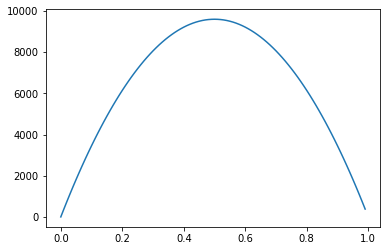

In [49]:
plt.plot(p,pint)

In [51]:
int(np.ceil(samplesize_confint_proportion(0.5, 0.01)))

9604

In [52]:
proportion_confint(1, 50, method = 'normal')

(0.0, 0.05880530708179099)

In [53]:
norm.ppf(1-0.0015)

2.9677379253417944

In [98]:
189 / 11034 - 104 / 11037

0.0077060239760047815

In [102]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha/2)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [103]:
sample1 = np.array([1]*104+[0]*(11037-104))
sample2 = np.array([1]*189+[0]*(11034-189))
import scipy


In [104]:
proportions_confint_diff_ind(sample2, sample1)

(0.004687750675049439, 0.010724297276960124)

In [62]:
odd1 = 104/(11037-104)
odd2 = 189/(11034-189)
odd1/odd2

0.5458354566559084

In [63]:
odd2/odd1

1.8320539419087138

In [105]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries
def odd(sample):
    return sum(sample)/(len(sample)-sum(sample))

In [106]:
np.random.seed(0)
odds1 = np.array(list(map(odd, get_bootstrap_samples(sample1, 1000))))
odds2 = np.array(list(map(odd, get_bootstrap_samples(sample2, 1000))))

In [107]:
divods = odds2/odds1

In [108]:
stat_intervals(divods, 0.05)

array([1.44419465, 2.34321168])

In [80]:
samples1 = get_bootstrap_samples(sample1, 1000)
samples2 = get_bootstrap_samples(sample2, 1000)
divods = []
for i in range(len(samples1)):
    
    

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [100]:
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [101]:
proportions_confint_diff_rel(sample2, sample1)

(0.006072118919127238, 0.009334805133800077)

In [109]:
from scipy import stats

In [110]:
stats.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.08222258891386608

In [137]:
df = pd.read_csv('pines.txt', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 2 columns):
sn    584 non-null float64
we    584 non-null float64
dtypes: float64(2)
memory usage: 9.2 KB


In [143]:
i=0
j=0
step = 40
counts =[]
df.query('sn>='+str(i)+'and sn<='+str(i + step)+' and we>='+str(j)+' and we<='+str(j+step)).count()[0]

18

In [157]:
step = 40
counts =[]
for i in range(0,200,40):
    for j in range(0,200,40):
        counts.append(df.query('sn>'+str(i)+'and sn<='+str(i + step)+' and we>'+str(j)+' and we<='+str(j+step)).count()[0])

In [158]:
sum(counts)

582

In [151]:
df.query('sn == 80 and we == 80')

,sn,we


In [153]:
quar = []
for i in range(0,200,40):
    for j in range(0,200,40):
        quar.append([i,j])

In [156]:
quar

[[0, 0],
 [0, 40],
 [0, 80],
 [0, 120],
 [0, 160],
 [40, 0],
 [40, 40],
 [40, 80],
 [40, 120],
 [40, 160],
 [80, 0],
 [80, 40],
 [80, 80],
 [80, 120],
 [80, 160],
 [120, 0],
 [120, 40],
 [120, 80],
 [120, 120],
 [120, 160],
 [160, 0],
 [160, 40],
 [160, 80],
 [160, 120],
 [160, 160]]

In [164]:
distr = stats.binned_statistic_2d(df.sn.values, df.we.values, values=df.sn.values, statistic='count', bins=[5,5])[0]

584.0

In [167]:
584/25

23.36

In [168]:
expected = np.zeros((5,5))

In [169]:
for i in range(5):
    for j in range(5):
        expected[i,j] = 23.36

In [170]:
stats.chisquare(distr, expected, ddof = 1)

Power_divergenceResult(statistic=array([32.0619863 , 16.75376712, 14.89589041, 66.28972603, 20.58767123]), pvalue=array([5.07838299e-07, 7.94114804e-04, 1.90781409e-03, 2.65730456e-14,
       1.28210726e-04]))

In [171]:
expected = [23.36]*25

In [172]:
observed = []
for i in range(5):
    for j in range(5):
        observed.append(distr[i,j])

In [174]:
stats.chisquare(observed, expected, ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)